# Online Retail Market Segmentation

### Data Source: UCI Machine Learning Repository

Market segmentation (or customer segmentation) are techniques to split customers into clusters based on similarities to get a sense of their behavior. In this notebook, we are going to analyze patterns in the Online Retail Data Set from the UCI Machine Learning Repository. 

As UCI specifies about their dataset:

"This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers."

Columns description

1. InvoiceNo: A unique identifier for the invoice. An invoice number shared across rows means
that those transactions were performed in a single invoice (multiple purchases).
    
2. StockCode: Identifier for items contained in an invoice.
    
3. Description: Textual description of each of the stock items.
    
4. Quantity: The quantity of the item purchased.
    
5. InvoiceDate: Date of purchase.
    
6. UnitPrice: Value of each item.
    
7. CustomerID: Identifier for customer making the purchase.
    
8. Country: Country of customer.

Objective

which type of customers are loyal to us.

Get the market segmentation to better increase outcomes of marketing campaigns




## Importing Libraries

In [1]:
# Data Structure
import pandas as pd
import numpy as np

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler 

# Others
sns.set(style='darkgrid')
sns.set_theme()
import warnings
warnings.filterwarnings("ignore")

## Loading The Dataset

In [2]:
df =pd.read_csv(r"C:\Users\Henry Oguns\Desktop\Data Science Portfolio\datasets\Online Retail.csv")
pd.set_option("display.max_columns", None)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.shape

(541909, 8)

The dataset contains 541909 oservations and 8 Features

In [4]:
# Understandin the data type of each columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
# Changing the Invoice Date column to a date time data type

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [6]:
# Checking for the duplicates in the dataset and droppping them 

df.duplicated().sum()

5268

In [7]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [8]:
# Checking for null values in the dataset

df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [9]:
# filling the NAN values in the Description column with 'No Description'

df['Description'] = df['Description'].fillna('No Description')

In [10]:
df = df.dropna()
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Not knowing the Cutomer ID of the particular column would prevent the accuracy customer segmentation using this dataset. Also  a decision to drop this rows out of the dataset. 

In [11]:
df.shape

(401604, 8)

In [12]:
# Understanding the overall statistis of the dataset

df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,401604.000000,401604,401604.000000,401604.000000
mean,12.183273,2011-07-10 12:08:23.848567552,3.474064,15281.160818
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13939.000000
50%,5.000000,2011-07-29 15:40:00,1.950000,15145.000000
75%,12.000000,2011-10-20 11:58:30,3.750000,16784.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,250.283037,NaN,69.764035,1714.006089


In [13]:
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom


In [14]:
df['day'] = df.InvoiceDate.dt.day_name()
df['month'] = df.InvoiceDate.dt.month_name()
df['year'] = df.InvoiceDate.dt.year
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day,month,year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,December,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,2010


## Feature Engineering

In [17]:
# creating total price column for each of the orders

df['total_price'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day,month,year,total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,December,2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,December,2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,2010,20.34


In [18]:
# creating a dataframef for total price, customer frequency and recency

customer_df = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (df['InvoiceDate'].max() - x.max()).days,
                                            'InvoiceNo': 'count',
                                            'total_price': 'sum'})
customer_df.head()

,InvoiceDate,InvoiceNo,total_price
CustomerID,,,
12346.0,325,2,0.00
12347.0,1,182,4310.00
12348.0,74,31,1797.24
12349.0,18,73,1757.55
12350.0,309,17,334.40


In [19]:
# renaming the columns of customer_df DataFrame
customer_df.rename(columns={'InvoiceDate': 'recency',
                            'InvoiceNo': 'frequency',
                            'total_price': 'monetary'}, inplace=True)

customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4372 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   recency    4372 non-null   int64  
 1   frequency  4372 non-null   int64  
 2   monetary   4372 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 136.6 KB


The above dimension used are;

    Recency – How recently did the customer purchase?
    Frequency – How often do they purchase?
    Monetary Value – How much do they spend?
    
Which is known as the RFM Model

In this analysis, we must be careful with the time window since it can be biased or incurate if we
e try to span an extremely long duration.


## Exploratory Data Analysis

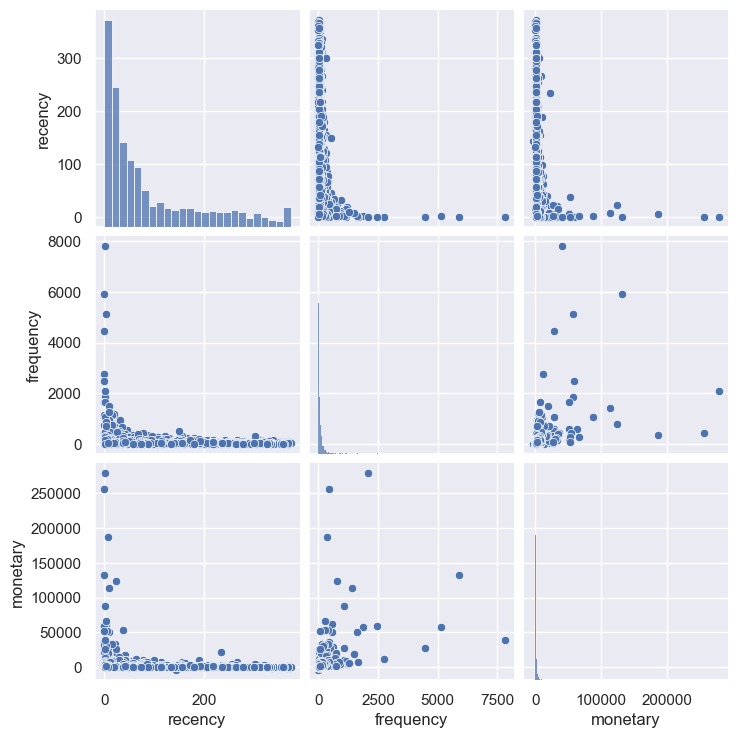

In [20]:
sns.pairplot(customer_df)
plt.show()

Analysis was carried out to better understand the relationship between the  Recency, Frequency and Monetary columns

## Feature Scaling

Using StandardScaler to ensures that all the variables are on the same scale, which is necessary for K-means clustering

In [21]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(customer_df)
print(X_scaled)

[[8.71313673e-01 1.28024581e-04 1.51091712e-02]
 [2.68096515e-03 2.31724491e-02 3.02971721e-02]
 [1.98391421e-01 3.84073742e-03 2.14424619e-02]
 ...
 [1.87667560e-02 1.53629497e-03 1.57314917e-02]
 [8.04289544e-03 9.21776981e-02 2.23174105e-02]
 [1.12600536e-01 8.83369607e-03 2.15835588e-02]]


In [22]:
# finding the wcss value for different number of clusters

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X_scaled)

    wcss.append(kmeans.inertia_)

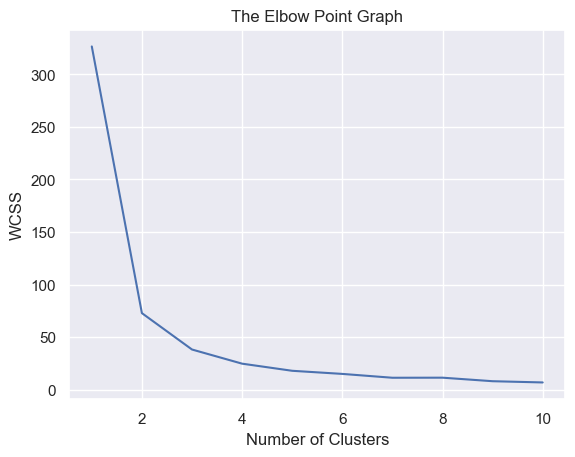

In [23]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()



There is a rapid increase of performance when n_cluster went from 1 to 2, yet after 3 clsuters, the performance maitained roughly at the same level. We can choose between 2 and 3 clusters and here we keep the n_clsuter at 3.


## Training the K-Means Clustering Model

In [24]:
kmeans = KMeans(n_clusters=3, n_init=10, random_state=33)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, n_init=10, random_state=33)

In [25]:
final_df = pd.DataFrame(X_scaled, columns=customer_df.columns, index=customer_df.index)

final_df['cluster'] = kmeans.labels_
final_df

,recency,frequency,monetary,cluster
CustomerID,,,,
12346.0,0.871314,0.000128,0.015109,1
12347.0,0.002681,0.023172,0.030297,2
12348.0,0.198391,0.003841,0.021442,2
12349.0,0.048257,0.009218,0.021303,2
12350.0,0.828418,0.002048,0.016288,1
...,...,...,...,...
18280.0,0.742627,0.001152,0.015746,1
18281.0,0.482574,0.000768,0.015394,0
18282.0,0.018767,0.001536,0.015731,2


## Characteristics Evaluation

Now let's have a look at the characteristics of each cluster, and see what customer insight we can obtain and try to answer our questions.

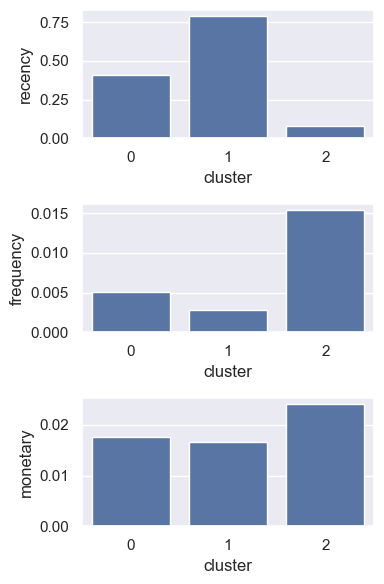

In [29]:
cluster_mean = final_df.groupby('cluster')[['recency', 'frequency', 'monetary']].mean().reset_index()

fig, axes = plt.subplots(nrows=3, figsize=(4, 6))

sns.barplot(cluster_mean, x='cluster', y='recency', ax=axes[0])
sns.barplot(cluster_mean, x='cluster', y='frequency', ax=axes[1])
sns.barplot(cluster_mean, x='cluster', y='monetary', ax=axes[2])

plt.tight_layout()

In [30]:
final_df['cluster'].value_counts()

cluster
2    2922
0     816
1     634
Name: count, dtype: int64

## Saving Model

In [ ]:
import pickle

In [ ]:
with open("customer_segmentation.pki", "wb") as f:
    pickle.dump(kmeans,f)

## Conclusion

After segmenting the customer data into different custers, we arrived at a unique characteristic and behavioural pattern exhited by each group. The segmentation revealed clear patterns in terms of customer recency, purchase frequency, and monetary value.

Cluster 0: "High-Value Regular Customers":
This cluster consists of customers with relatively high monetary value, moderate frequency, and recent transactions. They are likely to be loyal and valuable customers who make regular purchases.

Cluster 1: "Low-Value Occasional Customers":
This cluster includes customers with lower monetary value, lower frequency, and higher recency. They might be occasional buyers who make infrequent purchases.

Cluster 2: "High-Value VIP Customers":
This cluster represents customers with exceptionally high monetary value, high frequency, and very low recent transactions. They are top-tier customers who contribute significantly to the business's revenue and should be treated as VIPs.

Based on this analysis, we can help retention team to analyze churn customers before they leave the company and reducing customer churn to the avegerage of 5-10% annually.

With this, we can perfect strategic marketing campaigns by 20% and increased companies revneue by 15%.